# Algoritmos Genéticos

## Motivación

<center>
    <img src="figures/dog-1.png" width="900"/>
</center>

<center>
    <img src="figures/dog-2.png" width="1100"/>
</center>

## Técnicas evolutivas
- Algoritmos genéticos
- Programación genética
- Evolución diferencial
- Programación evolutiva
- Estrategias evolutivas

<center>
    <img src="figures/genetic-2.jpg" width="400"/>
</center>

# Algoritmos genéticos

## Generalidades
Son técnicas de optimización y descubrimiento de soluciones a problemas basadas en la teoría de la evolución de las especies

<center>
    <img src="figures/genetic-1.png" width="500"/>
</center>

Reflejan el proceso de selección natural en donde los mejores individuos (soluciones) son elegidos para traspasar sus genes a la siguiente generación

Una población de potenciales soluciones a un problema (individuos) se evoluciona a través de varias generaciones para obtener mejores soluciones

<center>
    <img src="figures/genetic-gif.gif" width="800"/>
</center>

Los individuos son caracterizados por su carga genética, cromosomas o fenotipo

Nuevos individuos van surgiendo de mezclar y alterar los genes de la generación anterior.

<center>
    <img src="figures/genetic-3.png" width="700"/>
</center>

## Metodología

&#10148; Se comienza con una población aleatoria de individuos (generación inicial).

&#10148; En cada generación se evalúa la aptitud (fitness) de cada individuo mediante una función asociada al problema a optimizar.

<br><center>
    <img src="figures/genetic-5.png" width="400"/>
</center>

&#10148; Se eligen los individuos más aptos (padres) para crear una nueva generación (hijos).

&#10148; El proceso continúa creando sucesivas generaciones hasta cumplir algún criterio de convergencia para seleccionar el individuo más apto (solución final).

<br><center>
    <img src="figures/genetic-4.jpg" width="400"/>
</center>

## Operadores genéticos
Los operadores genéticos son las técnicas usadas para crear nuevos individuos a partir de los mejores individuos de una generación 

<center>
    <img src="figures/genetic-6.png" width="600"/>
</center>


**Recombinación (cross-over)**

Se mezcla información de los padres para crear hijos

<center>
    <img src="figures/crossover-1.png" width="700"/>
</center>

**Mutación**

Aleatoriamente se altera parte de los genes de los hijos

<center>
    <img src="figures/mutation-1.png" width="400"/>
</center>

## Limitaciones

- Los algoritmos genéticos no escalan bien con la complejidad de un problema, ya que comúnmente hay un incremento exponencial del tamaño del espacio de búsqueda.
- La repetiva evaluación de la función de aptitud puede ser computacionalmente costoso para problemas complejos.
- El criterio de término puede ser ambiguo, ya que las soluciones solo son mejores en comparación a las otras.
- Puede ocurrir convergencia hacia una solución de mínimo local.
- Dependiendo del problema, pueden haber otros métodos de optimización más eficientes.

## Ejemplo

Usamos un algoritmo genético para, a partir de una población de 4 puntos en el plano, acercarnos lo más posible al punto (-0.4, 0.3)

<center>
    <img src="figures/genetic-example-1.png" width="500"/>
</center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

def fun_fitness(individual):
    return 1./np.linalg.norm(individual - np.array([-0.4, 0.3]))

def select_parents(population):
    all_fitness = np.array([fun_fitness(individual) for individual in population])
    max_fitness = np.max(all_fitness)
    
    sort_idx = np.argsort(all_fitness)
    idx_max1 = sort_idx[-1]
    idx_max2 = sort_idx[-2]
    return np.array([population[idx_max1], population[idx_max2]]), max_fitness

def crossover(parent1, parent2):
    flip = np.random.randint(2)
    if flip == 0:
        child = [parent1[0], parent2[1]]
    else:
        child = [parent2[0], parent1[1]]        
    return np.array(child)

In [4]:
def mutation(child): 
    flip = np.random.randint(4)    
    if flip == 0:
        mut_child = [child[0]*1.15, child[1]]
    elif flip == 1:
        mut_child = [-child[0]*1.15, child[1]]
    elif flip == 2:
        mut_child = [child[0], child[1]*1.15]
    else:
        mut_child = [child[0], -child[1]*1.15]
    return np.array(mut_child)

def offspring(parents, n_children):
    offspring = []
    for n in range(n_children):
        child = crossover(parents[0], parents[1])
        mut_child = mutation(child)
        offspring.append(mut_child)
    return np.array(offspring)

La mejor solución es:  [-0.40227144  0.30590229]


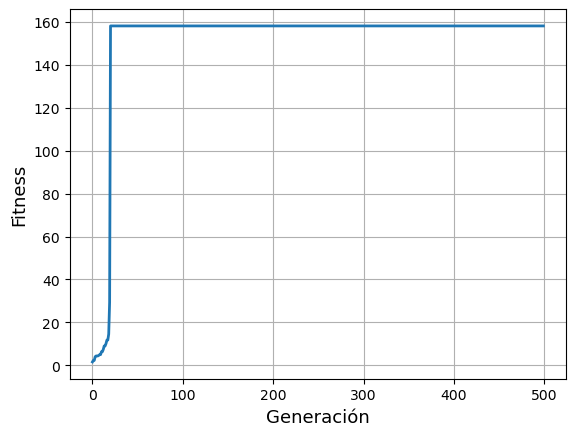

In [8]:
population = np.array([[0.1, -0.1], [0.3, 0.5], [-0.2, -0.3], [0.2, -0.5]])
n_generations = 500
scores = []
best_gen = []
for gen in range(n_generations):
    parents, max_fitness = select_parents(population)    
    scores.append(max_fitness)
    best_gen.append(parents[0])
    children = offspring(parents=parents, n_children=2)
    population = np.concatenate((parents, children), axis=0)

print('La mejor solución es: ', best_gen[-1])
     
plt.plot(scores, linewidth=2)
plt.xlabel('Generación',fontsize=13), plt.ylabel('Fitness', fontsize=13), plt.grid()
plt.show()

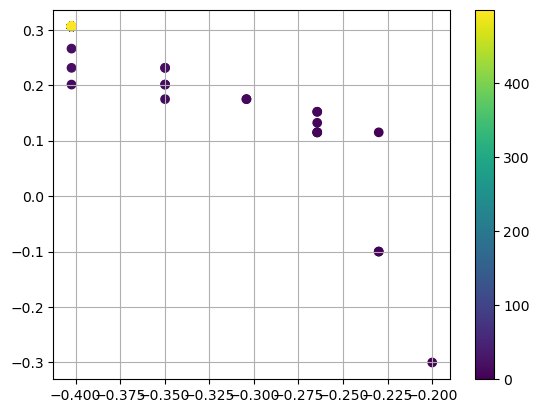

In [9]:
best_gen = np.array(best_gen)
plt.scatter(best_gen[:,0], best_gen[:,1], c=np.arange(len(best_gen)).astype(float))
plt.colorbar(), plt.grid()
plt.show()

# Aplicación: selección de hiperparámetros de clasificador

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_excel('others/uw-vehicle.xlsx', index_col=0)
X = df.values[:, 0:16]
y = df.values[:, 16]
display(df) #set de datos

,pwm1,pwm2,pwm3,pwm4,depth,press,voltage,roll,pitch,yaw,a_x,a_y,a_z,w_row,w_pitch,w_yaw,label
0,1100,1100,1100,1100,0.06,617,11.84,4.01,0.53,102.15,-0.19,0.57,8.73,2.3,0.2,0.1,0
1,1100,1100,1100,1100,0.03,614,11.80,4.14,0.55,102.16,-0.09,0.65,8.48,2.8,-0.1,0.2,0
2,1195,1195,1195,1195,0.01,612,11.80,4.29,0.53,102.17,0.02,0.46,8.44,3.4,0.4,0.2,0
3,1195,1195,1195,1195,-0.01,610,11.77,4.60,0.50,102.19,3.51,0.35,6.49,7.4,8.1,0.4,0
4,1195,1195,1195,1195,0.07,618,11.72,5.11,1.03,102.26,-6.60,1.30,10.15,13.7,22.3,-0.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17858,1202,1202,1202,1202,0.74,689,11.96,3.10,3.14,-22.97,-0.37,-0.41,8.74,7.5,2.1,-13.6,1
17859,1202,1202,1202,1202,0.70,685,11.95,3.40,2.81,-23.51,-5.05,-2.85,14.09,8.1,5.0,-10.0,1
17860,1202,1202,1202,1202,0.69,684,11.97,3.87,3.01,-24.01,-7.94,0.05,11.19,8.2,-0.4,-9.0,1
17861,1202,1202,1202,1202,0.73,688,11.96,3.83,3.13,-24.50,6.04,0.10,7.42,2.6,-3.2,-7.6,1


In [15]:
solvers_ = ['lbfgs', 'sgd', 'adam']
activations_ = ['tanh', 'logistic', 'relu']
alphas_ = [1.e-2, 1.e0, 1.e2]
hidden_layer_sizes_ = [(4,), (10,), (40,)]
max_iters_ = [100, 500, 1000]

def gen_sample():
    flip = np.random.randint(3, size=5)
    return (solvers_[flip[0]], activations_[flip[1]], alphas_[flip[2]], hidden_layer_sizes_[flip[3]], max_iters_[flip[4]])

def gen_population(n_samples):
    return [gen_sample() for i in range(n_samples)]



In [16]:
def fun_fitness(data, labels, hparams):
    clf = MLPClassifier(solver=hparams[0], activation=hparams[1], alpha=hparams[2], hidden_layer_sizes=hparams[3], max_iter=hparams[4], random_state=0)
    cv = cross_validate(estimator=clf, X=data, y=labels, cv=2, scoring='accuracy')
    return np.mean(cv['test_score'])

def select_parents(data, labels, population):
    all_fitness = np.array([fun_fitness(data, labels, hparams) for hparams in population])
    max_fitness = np.max(all_fitness)
    idx1 = np.argmax(all_fitness)    
    all_fitness[idx1] = -999
    idx2 = np.argmax(all_fitness)
    return [population[idx1], population[idx2]], max_fitness

def crossover(parent1, parent2):
    flip = np.random.randint(3)
    if flip == 0:
        child = (parent1[0], parent1[1], parent2[2], parent2[3], parent2[4])
    elif flip == 1:
        child = (parent2[0], parent2[1], parent1[2], parent1[3], parent1[4])
    elif flip == 2:
        child = (parent1[0], parent2[1], parent1[2], parent2[3], parent1[4])
    return child

In [17]:
def mutation(child): 
    mut_child = list(child)
    flip = np.random.randint(5)
    if (flip == 0) or (flip == 1): #solver o activacion
        mut = gen_sample()
        mut_child[flip] = mut[flip]
    elif flip == 3: #neuronas capa oculta
        foo = int(mut_child[flip][0]*(np.random.uniform(-0.2, 0.2)+1))
        mut_child[flip] = (foo,)
    elif flip == 4: #iteraciones (epocas)
        mut_child[flip] = int(mut_child[flip]*(np.random.uniform(-0.2, 0.2)+1))
    else: #otros
        mut_child[flip] = mut_child[flip]*(np.random.uniform(-0.2, 0.2)+1)
    return tuple(mut_child)

def offspring(parents, n_children):
    offspring = []
    for n in range(n_children):
        child = crossover(parents[0], parents[1])
        mut_child = mutation(child)
        offspring.append(mut_child)
    return offspring

In [18]:
from sklearn.model_selection import train_test_split

#covtype = fetch_covtype(as_frame=False)
#X = covtype.data[:1000]
#y = covtype.target[:1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=11)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
ini_population = gen_population(n_samples=4)
print(ini_population)

[('lbfgs', 'logistic', 0.01, (10,), 500), ('sgd', 'relu', 1.0, (10,), 100), ('adam', 'relu', 0.01, (40,), 100), ('adam', 'logistic', 1.0, (4,), 100)]


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

parents, max_fitness = select_parents(data=X_train, labels=y_train, population=ini_population)
print(parents[0])
print(max_fitness)

C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and 

('lbfgs', 'logistic', 0.01, (10,), 500)
0.9682501599488165


C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
n_generations = 10
scores = []
for g in range(n_generations):
    if g == 0:
        parents, max_fitness = select_parents(data=X_train, labels=y_train, population=ini_population)
    else:
        parents, max_fitness = select_parents(data=X_train, labels=y_train, population=population)
    scores.append(max_fitness)
    children = offspring(parents=parents, n_children=2)  
    population = children + parents

C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and 

('lbfgs', 'logistic', 0.01, (40,), 500)
0.9773672424824056


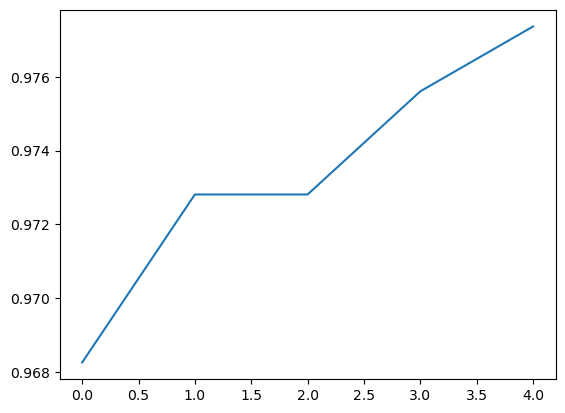

In [22]:
print(parents[0])
print(max_fitness)
plt.plot(scores)
plt.show()

# Sumario
- Los algoritmos evolutivos están inspirados por la teoría de la evolución, en donde se van eligiendo individuos más aptos en sucesivas generaciones.
- Los algoritmos genéticos emplean operaciones de recombinaciones y mutaciones para ir generando nuevas posibles soluciones a un problema a partir de una población inicial de soluciones.
- Aplicado al aprendizaje automático, los algoritmos genéticos pueden emplearse para la búsqueda de los hiperparámetros de un modelo.